# Cointegration Example in time series

Example 3.1 from the book "Likelihood-Based-Inference-Cointegrated-Autoregressive-Econometrics"

Check this link to update

https://github.com/mapsa/seminario-doc-2014/blob/master/cointegration-example.ipynb


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
import datetime
# %pylab inline
plt.rcParams['figure.figsize'] = (18.0, 8.0)

In [49]:
mu, sigma = 0, 1 # mean and standard deviation
n = 10000
s1 = np.random.normal(mu, sigma, n)
s2 = np.random.normal(mu, sigma, n)
s3 = np.random.normal(mu, sigma, n)

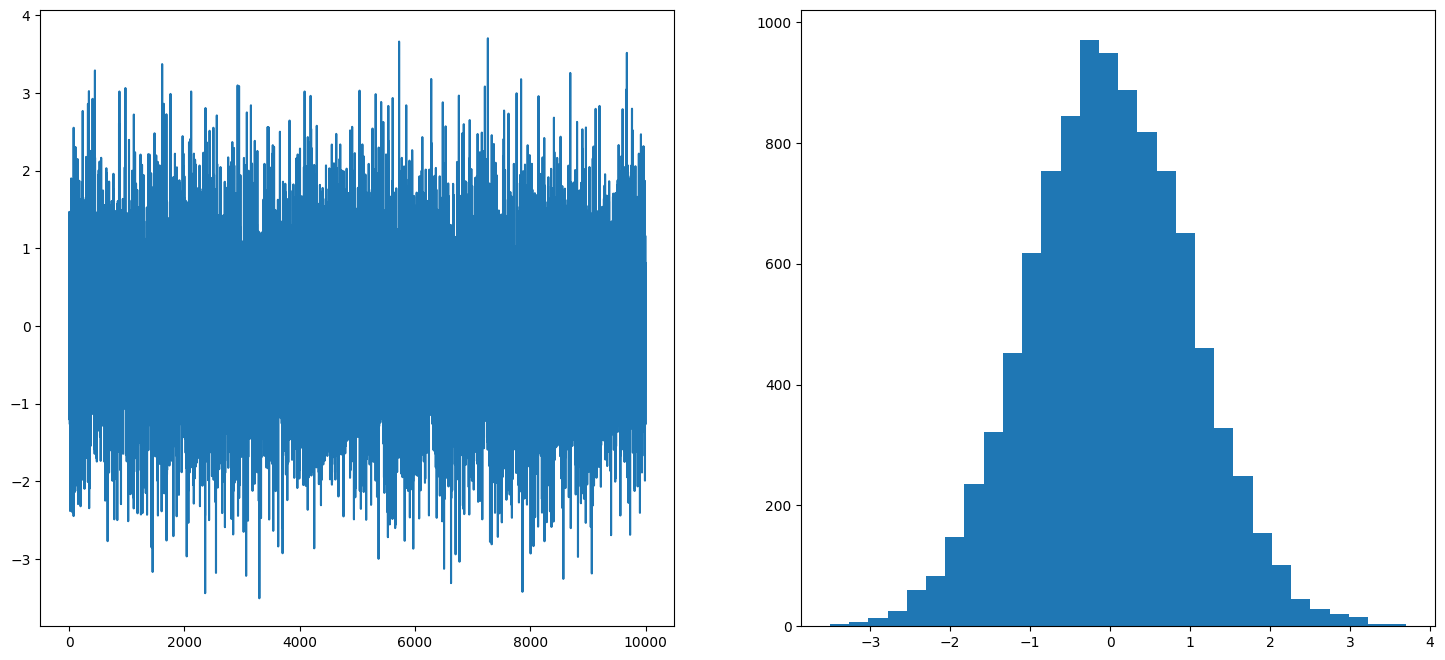

In [50]:
s = s1
plt.figure(1)
plt.subplot(121)
plt.plot(s)
plt.subplot(122)
# plt.hist(s, 30, normed=True)
plt.hist(s, 30)
plt.show()

<AxesSubplot: >

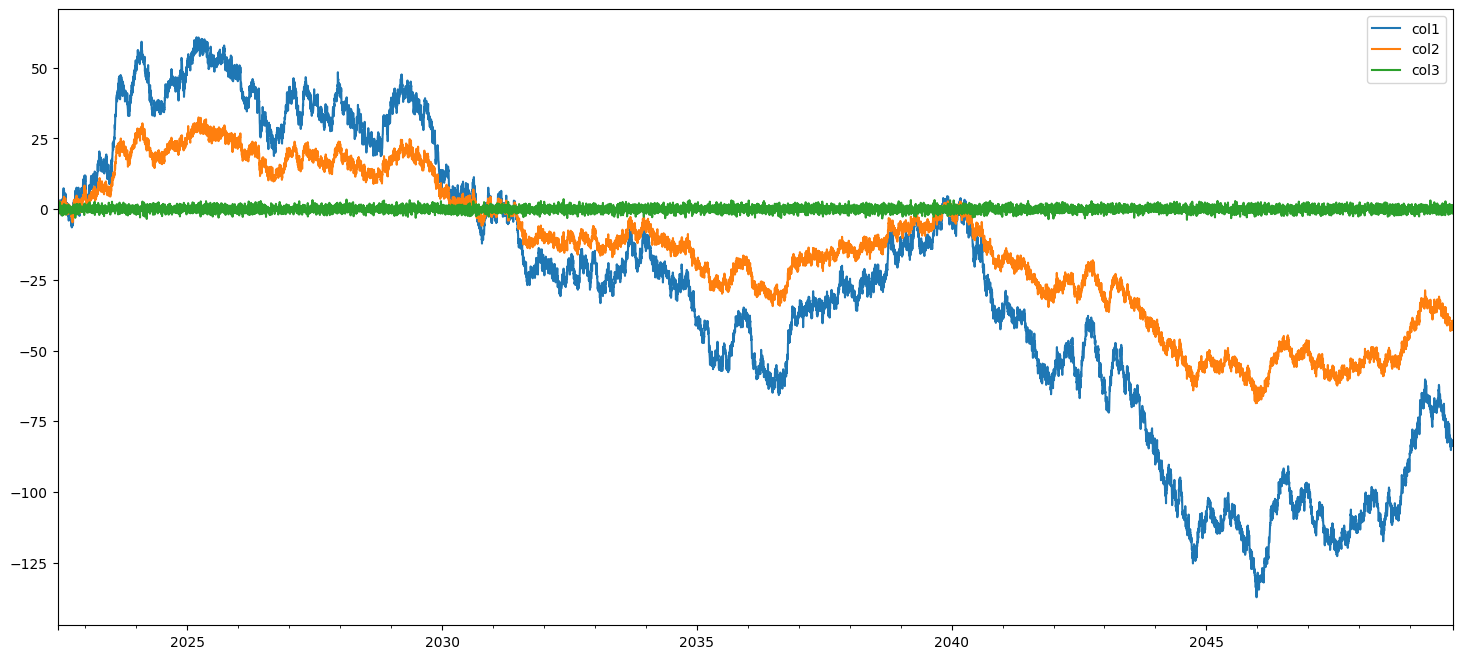

In [51]:
a = 0.5
x_1t = np.cumsum(s1)+s2
x_2t = a*np.cumsum(s1)+s3
x_3t = s3
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(100), periods=n, freq='D')
y = pd.DataFrame(index=index, data={'col1': x_1t, 'col2': x_2t, 'col3':x_3t} )
y.plot()

## Augmented Dickey Fuller test

In [52]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):
    """ Augmented Dickey Fuller test

    Parameters
    ----------
    v: ndarray matrix
        residuals matrix

    Returns
    -------
    bool: boolean
        true if v pass the test 
    """

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print (adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

# Testing Unit root

In [53]:
print (ADF(x_1t))   # unit root hypothesis can't be rejected
print (ADF(np.diff(x_1t)))
print (ADF(x_2t) )  # unit root hypothesis can't be rejected
print (ADF(np.diff(x_2t)))
print (ADF(x_3t))   # unit root hypothesis is rejected at the 95 per cent level  -> I(0)

(-0.3194561090805395, 0.5685193626893079, 4, 9995, {'1%': -2.5659637281522203, '5%': -1.9410269070891237, '10%': -1.616793453855115}, 38264.18251553054)
True
(-59.185561687657334, 0.0, 3, 9995, {'1%': -2.5659637281522203, '5%': -1.9410269070891237, '10%': -1.616793453855115}, 38259.456487162926)
False
(-0.38092902344406565, 0.5443228500237488, 6, 9993, {'1%': -2.5659637729364624, '5%': -1.9410269124810415, '10%': -1.616793448547595}, 33383.58318276939)
True
(-53.94380499678543, 0.0, 5, 9993, {'1%': -2.5659637729364624, '5%': -1.9410269124810415, '10%': -1.616793448547595}, 33379.01331090844)
False
(-97.85712847197745, 0.0, 0, 9999, {'1%': -2.565963638637491, '5%': -1.9410268963117674, '10%': -1.6167934644637916}, 28316.911389878125)
False


C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

## Johansen function

In [54]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

In [55]:
p=1
jres=get_johansen(y,p)
print ("There are ", jres.r, "cointegration vectors")
v1=jres.evecr[:,0]
v2=jres.evecr[:,1]
print (v1)
print (v2)
v3=jres.evec[:,2]  # v3 is not a cointegration vector

There are  2 cointegration vectors
[ 1.23583532 -2.47108446  1.78788182]
[-0.68594006  1.37181196 -2.59630632]


Even though we were expecting [0.5 -1 0] y [0 0 1] these vectors are in the same vector space. If we divide every vector by their second component we will get some similar results.

In [56]:
v1/-v1[1]

array([ 0.50011861, -1.        ,  0.72352113])

In [57]:
v2/-v2[1]

array([ 0.50002485, -1.        ,  1.89261093])

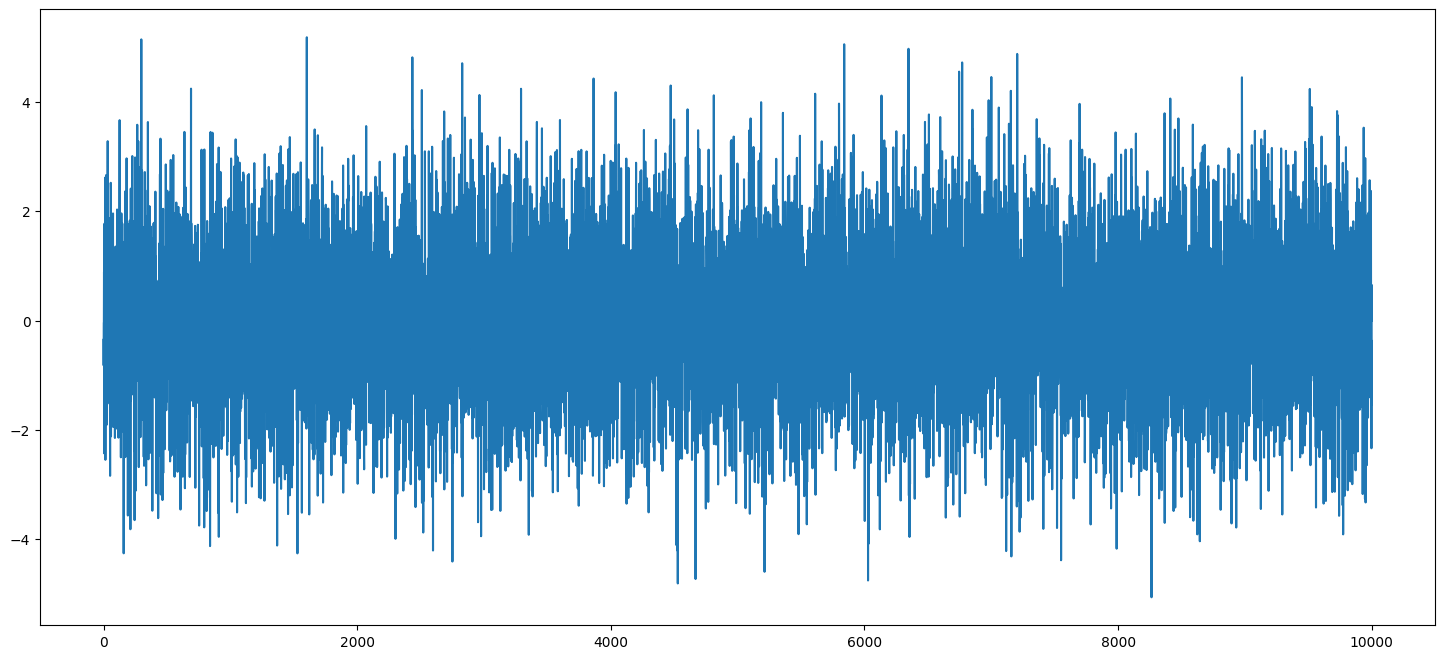

In [58]:
# If we apply vector v1 we get a I(0) time series
plt.plot(np.dot(y.values,v1))

In [59]:
# If we apply vector v2 we get a I(0) time series
plot(np.dot(y.values,v2))

NameError: name 'plot' is not defined

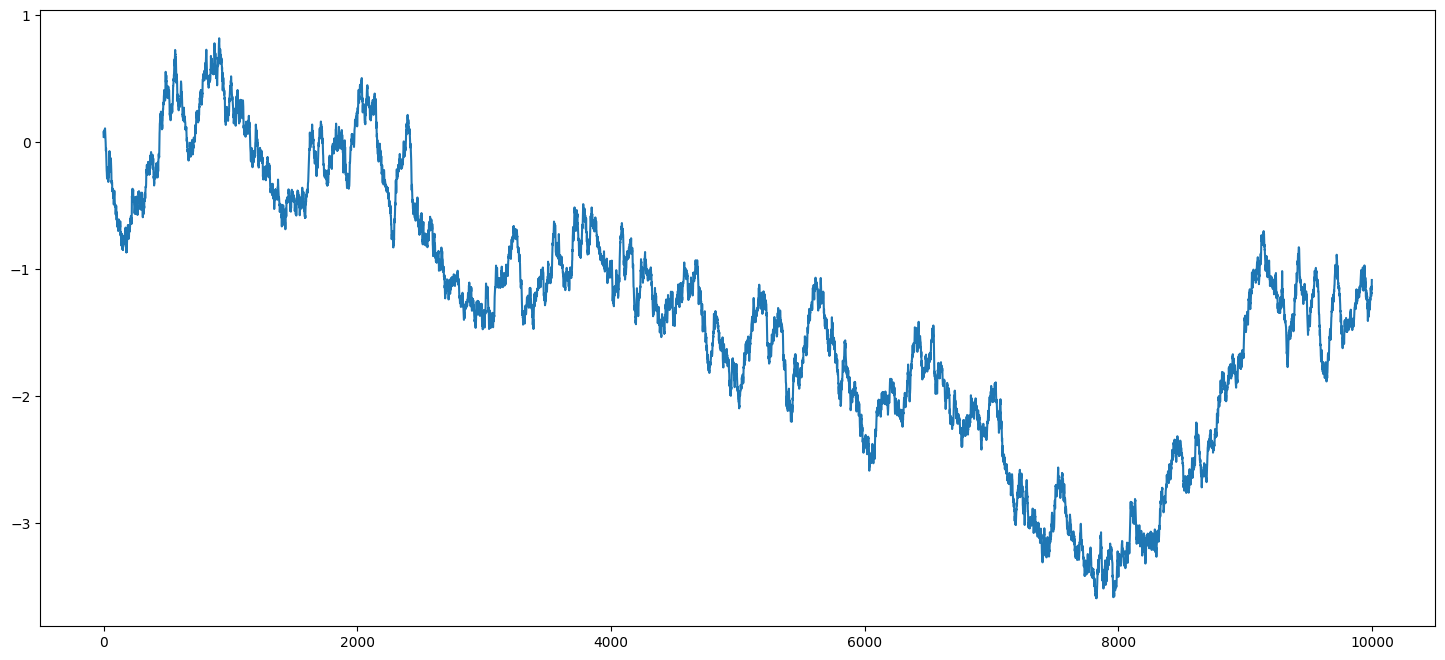

In [ ]:
# If we apply vector v3 we won't get a I(0) time series since it's not a cointegration vector.
plot(np.dot(y.values,v3))